In [1]:
# Imports
import time
import math
import sys
import numpy as np
import h5py
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import scipy
from PIL import Image
from scipy import ndimage
from tf_utils import load_dataset, random_mini_batches, convert_to_one_hot, predict
from fc_utils import *
from cnn_utils import *
%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(3)

/Users/samshen/anaconda/envs/py36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# train_data_orig, train_labels_orig, eval_data_orig, eval_labels_orig, classes = load_dataset()
# classes = 6
# train_labels = np.squeeze(train_labels_orig)
# train_labels_old = train_labels
# train_labels = one_hot_label(classes, train_labels_old)
# eval_labels = np.squeeze(eval_labels_orig)
# eval_labels_old = eval_labels
# eval_labels = one_hot_label(classes, eval_labels_old)
# # Flatten the training and test images
# train_data = train_data_orig.reshape(train_data_orig.shape[0], -1).T
# eval_data = eval_data_orig.reshape(eval_data_orig.shape[0], -1).T
# # Normalize image vectors
# train_data = train_data/255.
# eval_data = eval_data/255.
# features = train_data.shape[0]
# print(train_data.shape)

In [3]:
# Load training and eval data
mnist = tf.contrib.learn.datasets.load_dataset("mnist")
train_data = mnist.train.images # Returns np.array
classes = 10
train_labels = np.asarray(mnist.train.labels, dtype=np.int32)
train_labels = one_hot_label(classes, train_labels)
eval_data = mnist.test.images # Returns np.array
eval_labels_old = np.asarray(mnist.test.labels, dtype=np.int32)
eval_labels = one_hot_label(classes, eval_labels_old)
features = train_data.shape[0]

Instructions for updating:
Use the retry module or similar alternatives.
Instructions for updating:
Please use tf.data.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST-data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST-data/train-labels-idx1-ubyte.gz
Extracting MNIST-data/t10k-images-idx3-ubyte.gz
Extracting MNIST-data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


(55000, 784)
(10000, 784)


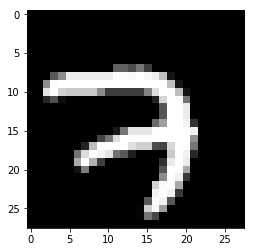

In [4]:
print(train_data.shape)
print(eval_data.shape)
# Input Layer
input_layer = train_data.reshape(55000,1,28,28)
eval_data = eval_data.reshape(10000,1,28,28)
plt.imshow(input_layer[0,0])

## Plan
**input layer:** mx28x28x1

**conv layer1 + Relu:** mx28x28x32

**pool layer1:** mx14x14x32

**conv layer2 + Relu:** mx14x14x64

**pool layer2:** mx7x7x64

**flatten:** mx3136

**fc layer1:** mx1024

**output layer:** mx10

**softmax:** mx10

Cost after iteration 0, batch 0: 2.302816
Cost after iteration 0, batch 1: 2.299324
Cost after iteration 0, batch 2: 2.300398
Cost after iteration 0, batch 3: 2.300068
Cost after iteration 0, batch 4: 2.301197
Cost after iteration 0, batch 5: 2.300677
Cost after iteration 0, batch 6: 2.300179
Cost after iteration 0, batch 7: 2.301040
Cost after iteration 0, batch 8: 2.298386
Cost after iteration 0, batch 9: 2.301996
Cost after iteration 0, batch 10: 2.300668
Cost after iteration 0, batch 11: 2.300545
Cost after iteration 0, batch 12: 2.298554
Cost after iteration 0, batch 13: 2.302723
Cost after iteration 0, batch 14: 2.300301
Cost after iteration 0, batch 15: 2.302373
Cost after iteration 0: 2.302373


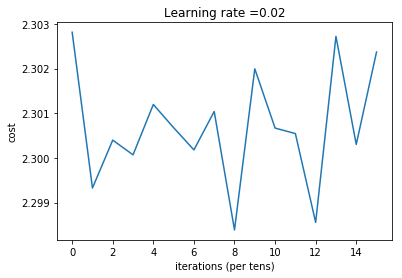

In [9]:
# training model
filter_dims = [(32,1,5,5),(64,32,5,5)]
layers_dims = [3136, 1024, classes] #  2-layer model
parameters, parameters_conv, grads, conv_grads = cnn_model(input_layer[0:2048], train_labels[0:2048], filter_dims, layers_dims, 
                                                           truncate = 8, batch_size = 128, learning_rate = 0.02, num_iterations = 1, print_cost = True)


Cost after iteration 0, batch 0: 0.843949
Cost after iteration 0, batch 1: 0.614800
Cost after iteration 0, batch 2: 0.576280
Cost after iteration 0, batch 3: 0.591607
Cost after iteration 0, batch 4: 0.467541
Cost after iteration 0, batch 5: 0.540017
Cost after iteration 0, batch 6: 0.487138
Cost after iteration 0, batch 7: 0.665356
Cost after iteration 0: 0.665356
Cost after iteration 1, batch 0: 0.612343
Cost after iteration 1, batch 1: 0.501416
Cost after iteration 1, batch 2: 0.534425
Cost after iteration 1, batch 3: 0.562635
Cost after iteration 1, batch 4: 0.441146
Cost after iteration 1, batch 5: 0.514694
Cost after iteration 1, batch 6: 0.467173
Cost after iteration 1, batch 7: 0.651070
Cost after iteration 1: 0.651070
Cost after iteration 2, batch 0: 0.602326
Cost after iteration 2, batch 1: 0.495909
Cost after iteration 2, batch 2: 0.524780
Cost after iteration 2, batch 3: 0.551554
Cost after iteration 2, batch 4: 0.433108
Cost after iteration 2, batch 5: 0.498832
Cost after

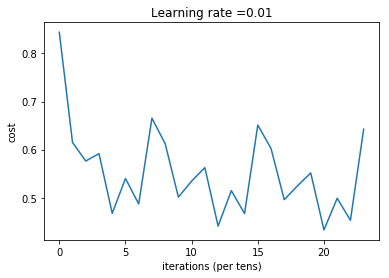

In [17]:
#further training on the same model 
parameters, parameters_conv, grads, conv_grads = cnn_model(input_layer[0:2048], train_labels[:,0:2048], layers_dims, filter_dims, truncate = 8, batch_size = 256, learning_rate = 0.01, num_iterations = 3, parameters = parameters, parameters_conv = parameters_conv, print_cost = True)


In [ ]:
train_labels.shape

In [ ]:
#eval_cnn_model(input_layer[0:256], train_labels[:,0:256], parameters, parameters_conv)

eval_cnn_model(eval_data[0:256], eval_labels[:,0:256], parameters, parameters_conv)

In [ ]:
np.set_printoptions(threshold=sys.maxsize)

In [ ]:
image_num = 88
predict_cnn(eval_data[image_num:image_num+1],parameters, parameters_conv)
print("actual value: " + str(eval_labels_old[image_num]))
data = mnist.test.images[image_num].reshape(28,28)
plt.imshow(data)

/Users/samshen/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  import sys


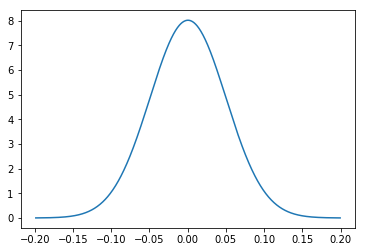

one std is 0.049739069248406


In [6]:
out = np.concatenate((parameters_conv['W1'].reshape(-1),parameters_conv['b1'].reshape(-1), 
                     parameters_conv['W3'].reshape(-1), parameters_conv['b3'].reshape(-1)))
mu = np.mean(out)
variance = np.var(out)
sigma = math.sqrt(variance)
x = np.linspace(mu - 4 * sigma , mu + 4 * sigma , 1000)
plt.plot(x,mlab.normpdf(x, mu, sigma))
plt.show()
print("one std is",sigma)

/Users/samshen/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  import sys


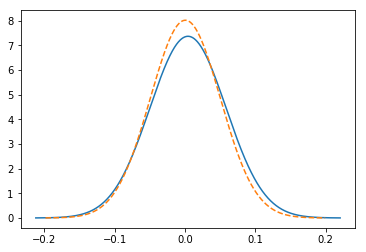

one std is 0.05413045523609097


In [8]:
out_m = np.concatenate((parameters_conv['W1'].reshape(-1),parameters_conv['b1'].reshape(-1), 
                     parameters_conv['W3'].reshape(-1), parameters_conv['b3'].reshape(-1)))
mu_m = np.mean(out_m)
variance_m = np.var(out_m)
sigma_m = math.sqrt(variance_m)
y = np.linspace(mu_m - 4 * sigma_m , mu_m + 4 * sigma_m , 1000)
plt.plot(y,mlab.normpdf(y, mu_m, sigma_m),'-', x, mlab.normpdf(x, mu, sigma), '--')
plt.show()
print("one std is",sigma_m)

In [ ]:
out = np.concatenate((conv_grads['dW1'].reshape(-1),conv_grads['db1'].reshape(-1), 
                     conv_grads['dW3'].reshape(-1), conv_grads['db3'].reshape(-1)))
mu = np.mean(out)
variance = np.var(out)
sigma = math.sqrt(variance)
x = np.linspace(mu - 4 * sigma , mu + 4 * sigma , 1000)
plt.plot(x,mlab.normpdf(x, mu, sigma))
plt.show()
print("one std is",sigma)

In [ ]:
out_m = np.concatenate((conv_grads['dW1'].reshape(-1),conv_grads['db1'].reshape(-1), 
                     conv_grads['dW3'].reshape(-1), conv_grads['db3'].reshape(-1)))
mu_m = np.mean(out_m)
variance_m = np.var(out_m)
sigma_m = math.sqrt(variance_m)
x_m = np.linspace(mu_m - 4 * sigma_m , mu_m + 4 * sigma_m , 1000)
plt.plot(x_m,mlab.normpdf(x_m, mu_m, sigma_m),'-', x, mlab.normpdf(x, mu, sigma), '--')
plt.show()
print("one std is",sigma_m)

In [ ]:
out_f = np.concatenate((conv_grads['dW1'].reshape(-1),conv_grads['db1'].reshape(-1), 
                     conv_grads['dW3'].reshape(-1), conv_grads['db3'].reshape(-1)))
mu_f = np.mean(out_f)
variance_f = np.var(out_f)
sigma_f = math.sqrt(variance_f)
x_f = np.linspace(mu_f - 4 * sigma_f , mu_f + 4 * sigma_f , 1000)
plt.plot(x_f,mlab.normpdf(x_f, mu_f, sigma_f),'-',x_m,mlab.normpdf(x_m, mu_m, sigma_m),'-.', x, mlab.normpdf(x, mu, sigma), '--')
plt.show()
print("one std is",sigma_f)

In [ ]:
t = np.arange(0., 5., 0.2)

# red dashes, blue squares and green triangles
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^', t, t**4, 'r-')
plt.show()

In [ ]:
out = np.concatenate((parameters_conv['W1'].reshape(-1),parameters_conv['W3'].reshape(-1),
                      parameters_conv['b1'].reshape(-1),parameters_conv['b3'].reshape(-1),
                      conv_grads['dW1'].reshape(-1), conv_grads['dW3'].reshape(-1),
                      conv_grads['db1'].reshape(-1),conv_grads['db3'].reshape(-1)))
out = out.reshape(-1,8)
np.savetxt("parameters.csv", out, delimiter=",")